In [114]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 22})
# Any results you write to the current directory are saved as output.

In [115]:
with open("forest_cover.csv", 'rt') as f:
    train = pd.read_csv(f)

In [116]:
train.shape

(15120, 56)

In [117]:
train.sample(5)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
12588,12589,2152,357,20,0,0,990,185,201,150,...,0,0,0,0,0,0,0,0,0,4
13883,13884,2473,47,9,42,3,1008,223,220,131,...,0,0,0,0,0,0,0,0,0,6
434,435,2873,351,6,201,11,3459,210,230,159,...,0,0,0,0,0,0,0,0,0,2
9067,9068,3078,346,9,384,61,1626,203,226,161,...,1,0,0,0,0,0,0,0,0,2
14030,14031,2861,99,19,270,139,1865,248,210,82,...,0,0,0,0,0,0,0,0,0,5


In [118]:
covert = {1:"Spruce",2:"Lodgepole Pine",3:"Ponderosa Pine",4:"Willow",5:"Aspen",6:"Douglas-fir",7:"Krummholz"}
train["Cover"] = train.Cover_Type.apply(lambda x:covert.get(x))

# Choose one variable and plot that variable four different ways.

The most significant variable is the **Elevation**.

The BoxPlot and Boxen Plot given the same overview, with Boxen ("Letter-value plots") giving further details on the distribution.

DistPlot and Violin Plot allow to capture more understanding of the shape of the shape, capturing in this case the modes that you do not see in the BoxPlot.

In the Distplot, the "Rug" option does not bring much information has there is a lot of data points, and would be more useful on a smaller dataset.

When limiting the number of samples to 200, the rug option gives us a visual indication of where the points are, allowing to see a very local concentration that neither the histogramme of the kernel could capture.

/Users/severinhatt/Virtualenvs/thinkful/base_plotting/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


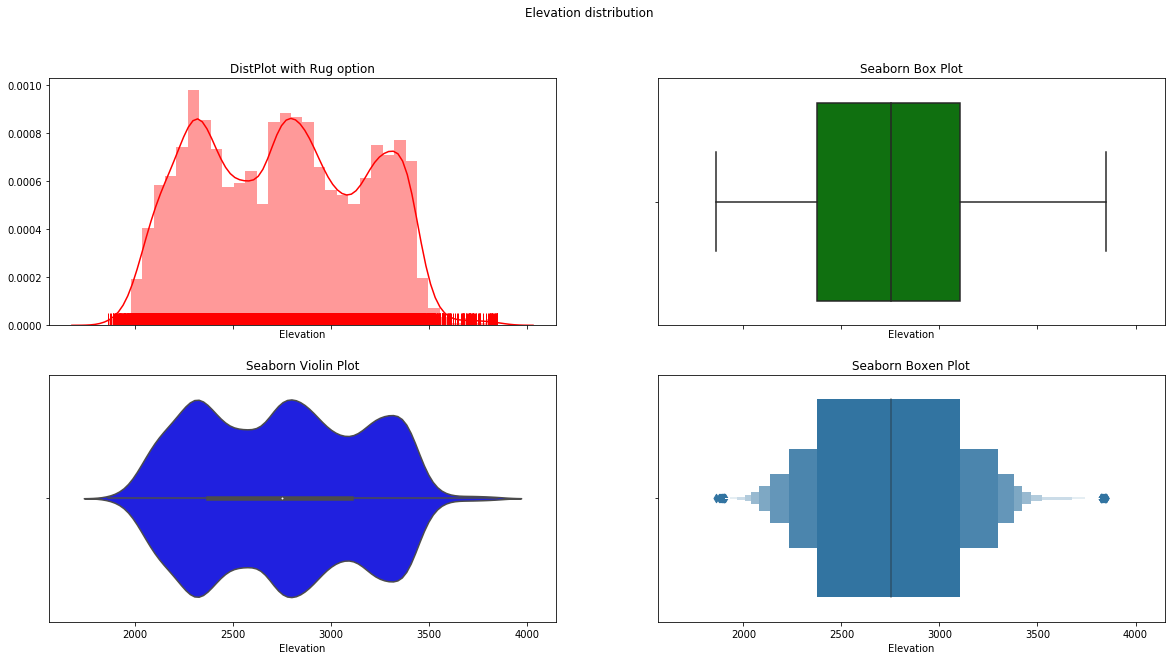

In [7]:
f, axes = plt.subplots(2, 2, sharex=True, figsize=(20, 10))

#sns.distplot(train.Elevation, kde=False, color="b", ax=axes[0]);
    
sns.distplot(train.Elevation, hist=True, rug=True, color="r",ax=axes[0][0])
axes[0][0].set_title("DistPlot with Rug option")
sns.boxplot(x=train.Elevation,ax=axes[0][1],color="g")
axes[0][1].set_title("Seaborn Box Plot")

sns.violinplot(x=train.Elevation,ax=axes[1][0],color="b")
axes[1][0].set_title("Seaborn Violin Plot")

sns.boxenplot(x=train.Elevation,ax=axes[1][1])
axes[1][1].set_title("Seaborn Boxen Plot")

f.suptitle('Elevation distribution');


/Users/severinhatt/Virtualenvs/thinkful/base_plotting/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0.98,'Distplot with Rug option with only 200 points')

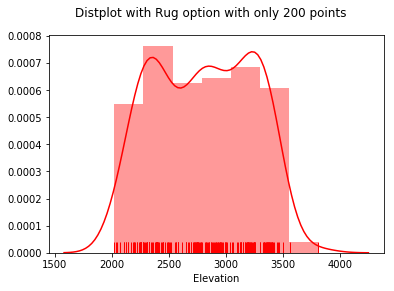

In [8]:
g =sns.distplot(train.sample(200).Elevation, hist=True, rug=True, color="r")
g.figure.suptitle("Distplot with Rug option with only 200 points")

# Choose two continuous variables, and plot them three different ways.

I have selected the **Elevation** variable and the **Horizontal_Distance_To_Hydrology**.

Once again, has the data is rather large, we might need to transform it to make the visualisation better.

Both JointPlot with Hexbin and Kde Plot give a first indication of the relationship. For the Kernel, there is a suggestion that the values of **Horizontal_Distance_To_Hydrology** could be negative, that is of course an artefact.

Using PairGrid, you can also get a better idea of the raltion between the variable.

For this case with many data points, I used LinePlot using the median function. As the plot was still difficult to read, I further round the **Elevation** to the nearest 10 to allow to have a less noisy graph.

For the last graph, I used the median function has there are a lot of "0" Distance.


In [9]:
train["Distance"] =train.Horizontal_Distance_To_Hydrology

/Users/severinhatt/Virtualenvs/thinkful/base_plotting/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0.98,'Elevation and Horizontal distance to hydrology')

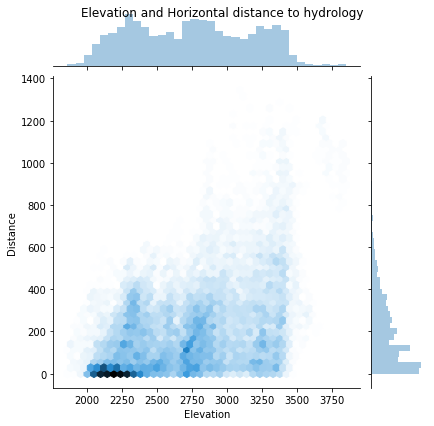

In [10]:
g =sns.jointplot(train.Elevation,train.Distance,kind="hex");
g.fig.suptitle("Elevation and Horizontal distance to hydrology")

/Users/severinhatt/Virtualenvs/thinkful/base_plotting/lib/python3.7/site-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


Text(0.5,1,'Elevation and Horizontal distance to hydrology')

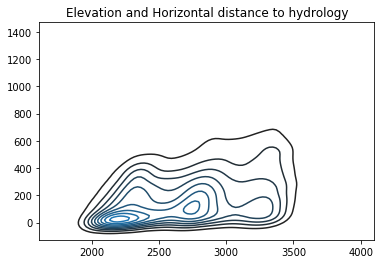

In [11]:
g = sns.kdeplot(train[["Elevation","Horizontal_Distance_To_Hydrology"]])
g.set_title("Elevation and Horizontal distance to hydrology")


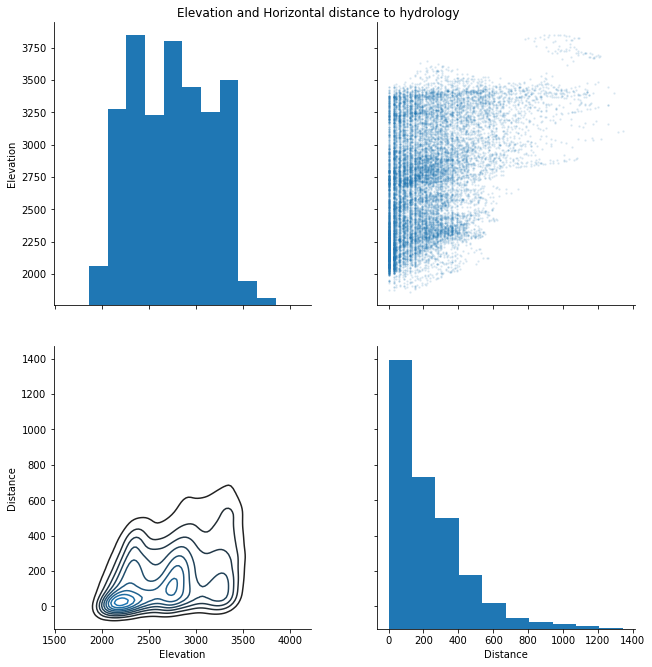

In [12]:

g = sns.PairGrid(train[["Elevation","Distance"]],
                 diag_sharey=False)
g.fig.set_size_inches(10,10)
g.fig.suptitle("Elevation and Horizontal distance to hydrology")
g.map_lower(sns.kdeplot)
g.map_upper(plt.scatter,alpha=0.1, s=2)
g.map_diag(plt.hist)


/Users/severinhatt/Virtualenvs/thinkful/base_plotting/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Elevation rounded to the nearest decade and Median Horizontal distance to hydrology')

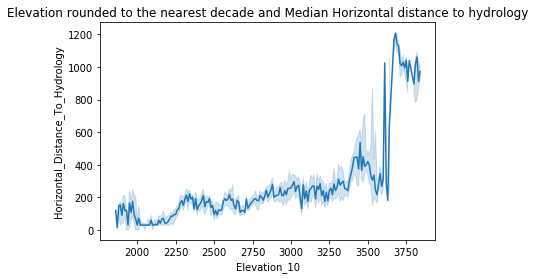

In [13]:
train["Elevation_10"]= (train.Elevation//10)*10
g = sns.lineplot(x="Elevation_10", y="Horizontal_Distance_To_Hydrology", data=train,estimator=np.median);
g.set_title("Elevation rounded to the nearest decade and Median Horizontal distance to hydrology")

# Choose one continuous variable and one categorical variable, and plot them six different ways.

Here again the number of data points will limit the type of graph you can use.

The first 4 graphs represent the complete data set. To be noted that for the PointPlot, the error bar is so small you cannot see it.

The following 4 graphs use a down-sampled version of the dataset (randomly selected 1000 points). Here the SwarmPlot is able to give us a better visual indication that the StripPlot.

Finally, if we limit ourselves to only 2 values of the categorical value, we can use a Viloin Plot with the option Split set to true.

/Users/severinhatt/Virtualenvs/thinkful/base_plotting/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


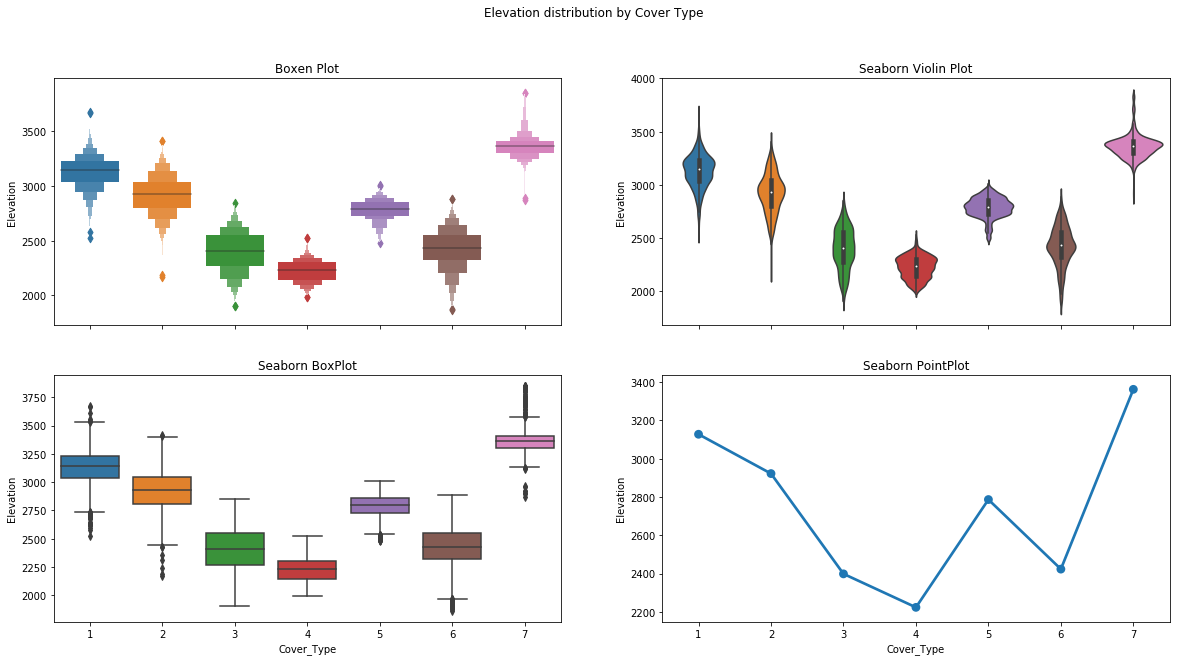

In [14]:
f, axes = plt.subplots(2, 2, sharex=True, figsize=(20, 10))

#sns.distplot(train.Elevation, kde=False, color="b", ax=axes[0]);
    
sns.boxenplot(x="Cover_Type", y="Elevation", data=train,ax=axes[0][0]);
axes[0][0].set_title("Boxen Plot")
axes[0][0].axes.set_xlabel("")
sns.violinplot(x="Cover_Type", y="Elevation", data=train,ax=axes[0][1])
axes[0][1].set_title("Seaborn Violin Plot")
axes[0][1].axes.set_xlabel("")

sns.boxplot(x="Cover_Type", y="Elevation", data=train,ax=axes[1][0])
axes[1][0].set_title("Seaborn BoxPlot")

sns.pointplot(x="Cover_Type", y="Elevation", data=train,ax=axes[1][1])
axes[1][1].set_title("Seaborn PointPlot")


f.suptitle('Elevation distribution by Cover Type');



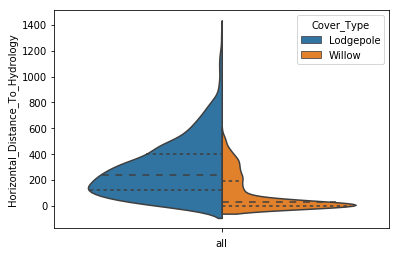

In [16]:
#sns.catplot(x="day", y="total_bill", hue="smoker",
#            kind="violin", split=True, data=tips);
covert = {1:"Spruce",2:"Lodgepole",4:"Willow",7:"Krummholz"}
train_1_7 = train[train.Cover_Type.isin([2,4])].copy()
train_1_7["all"] = ""
train_1_7["Cover_Type"] = train_1_7.Cover_Type.apply(lambda x:covert.get(x))

ax = sns.violinplot(data=train_1_7,x='all',y='Horizontal_Distance_To_Hydrology',hue="Cover_Type", split=True, scale="count", inner="quartile");

# Challenge

To make the plots easier to read, I limited the categorical values to 3 different categories.

The main feature to predict the **Cover_Type** is clearly the **Elevation** that has different distribution from one category to the other.

We can also notice the relationship between **Slope** and **Hillshade_Noon** : as the slope increases, there is a much greaster variation in **Hillshade_Noon**.

At a lesser degree, there is a relationship between **Elevation** and **Horizontal_Distance_To_Hydrology** : as the **Elevation** increasese the maximum **Horizontal_Distance_To_Hydrology** increases.


In [17]:
train_challenge = train[train.Cover_Type.isin([2,4,7])].copy()

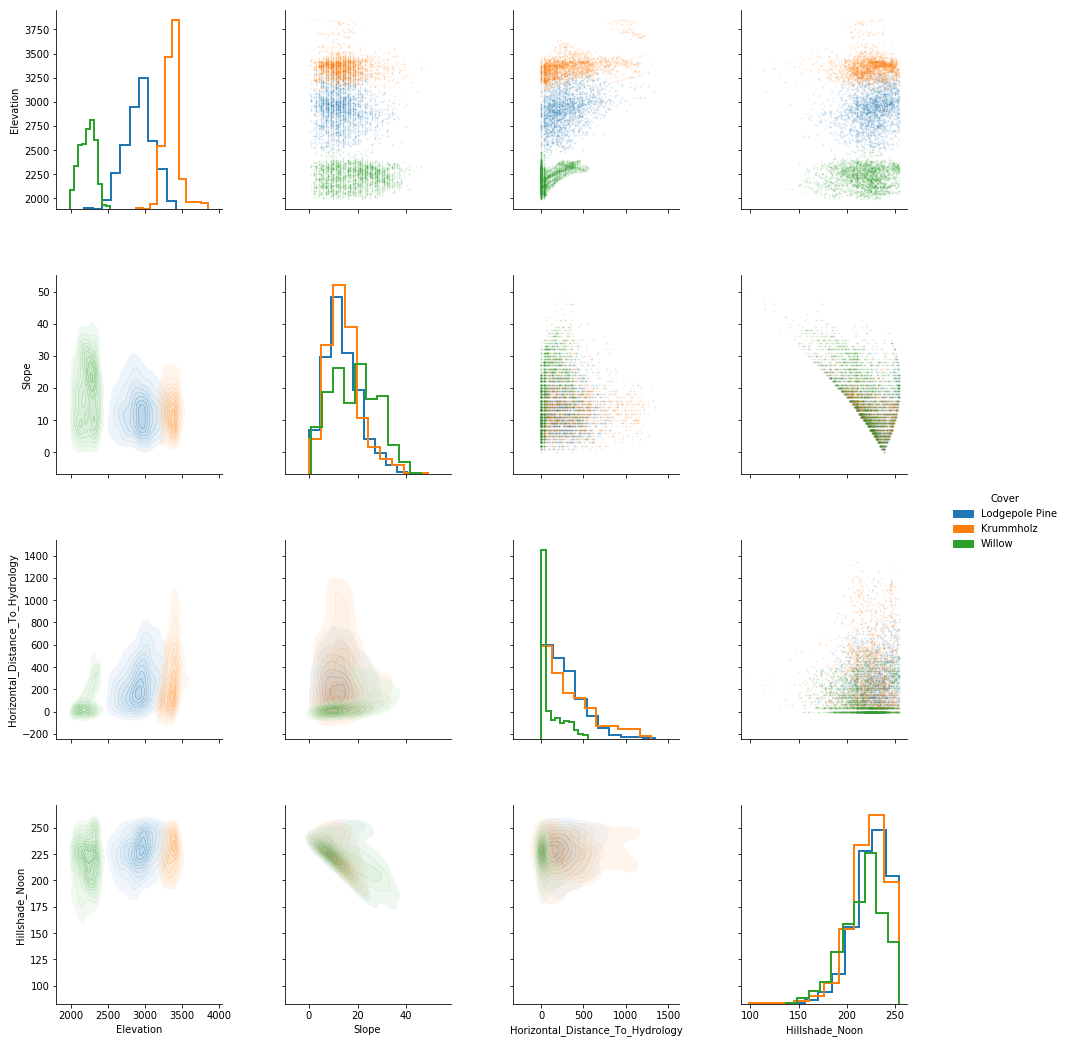

In [18]:
g = sns.PairGrid(train_challenge, vars=['Elevation', 'Slope',
       'Horizontal_Distance_To_Hydrology', 
       'Hillshade_Noon'],
                 hue="Cover",diag_sharey=False)
g.map_upper(plt.scatter,alpha=0.1, s=1)

g.map_lower(sns.kdeplot,alpha=0.3,shade=True, shade_lowest=False)
g = g.map_diag(plt.hist, histtype="step", linewidth=2)

g.add_legend();
g.fig.set_size_inches(15,15)

In [1]:
"Soil_" in "Soil_1" 

True

In [2]:
train["Soil"]= train[[col for col in train.columns if "Soil_" in col]].idxmax(1)
train = train.drop([col for col in train.columns if col[:5] == "Soil_"],axis=1)
train["Wilderness"]= train[[col for col in train.columns if col[:4] == "Wild"]].idxmax(1)
train = train.drop([col for col in train.columns if col[:11] == "Wilderness_"],axis=1)

NameError: name 'train' is not defined

In [10]:
train_less_Soil = train[(train.Cover_Type.isin([1,2,3]))&(train.Soil.isin(['Soil_Type10','Soil_Type29','Soil_Type3']))].copy()
train_less_Soil.Soil = pd.Categorical(train_less_Soil.Soil)

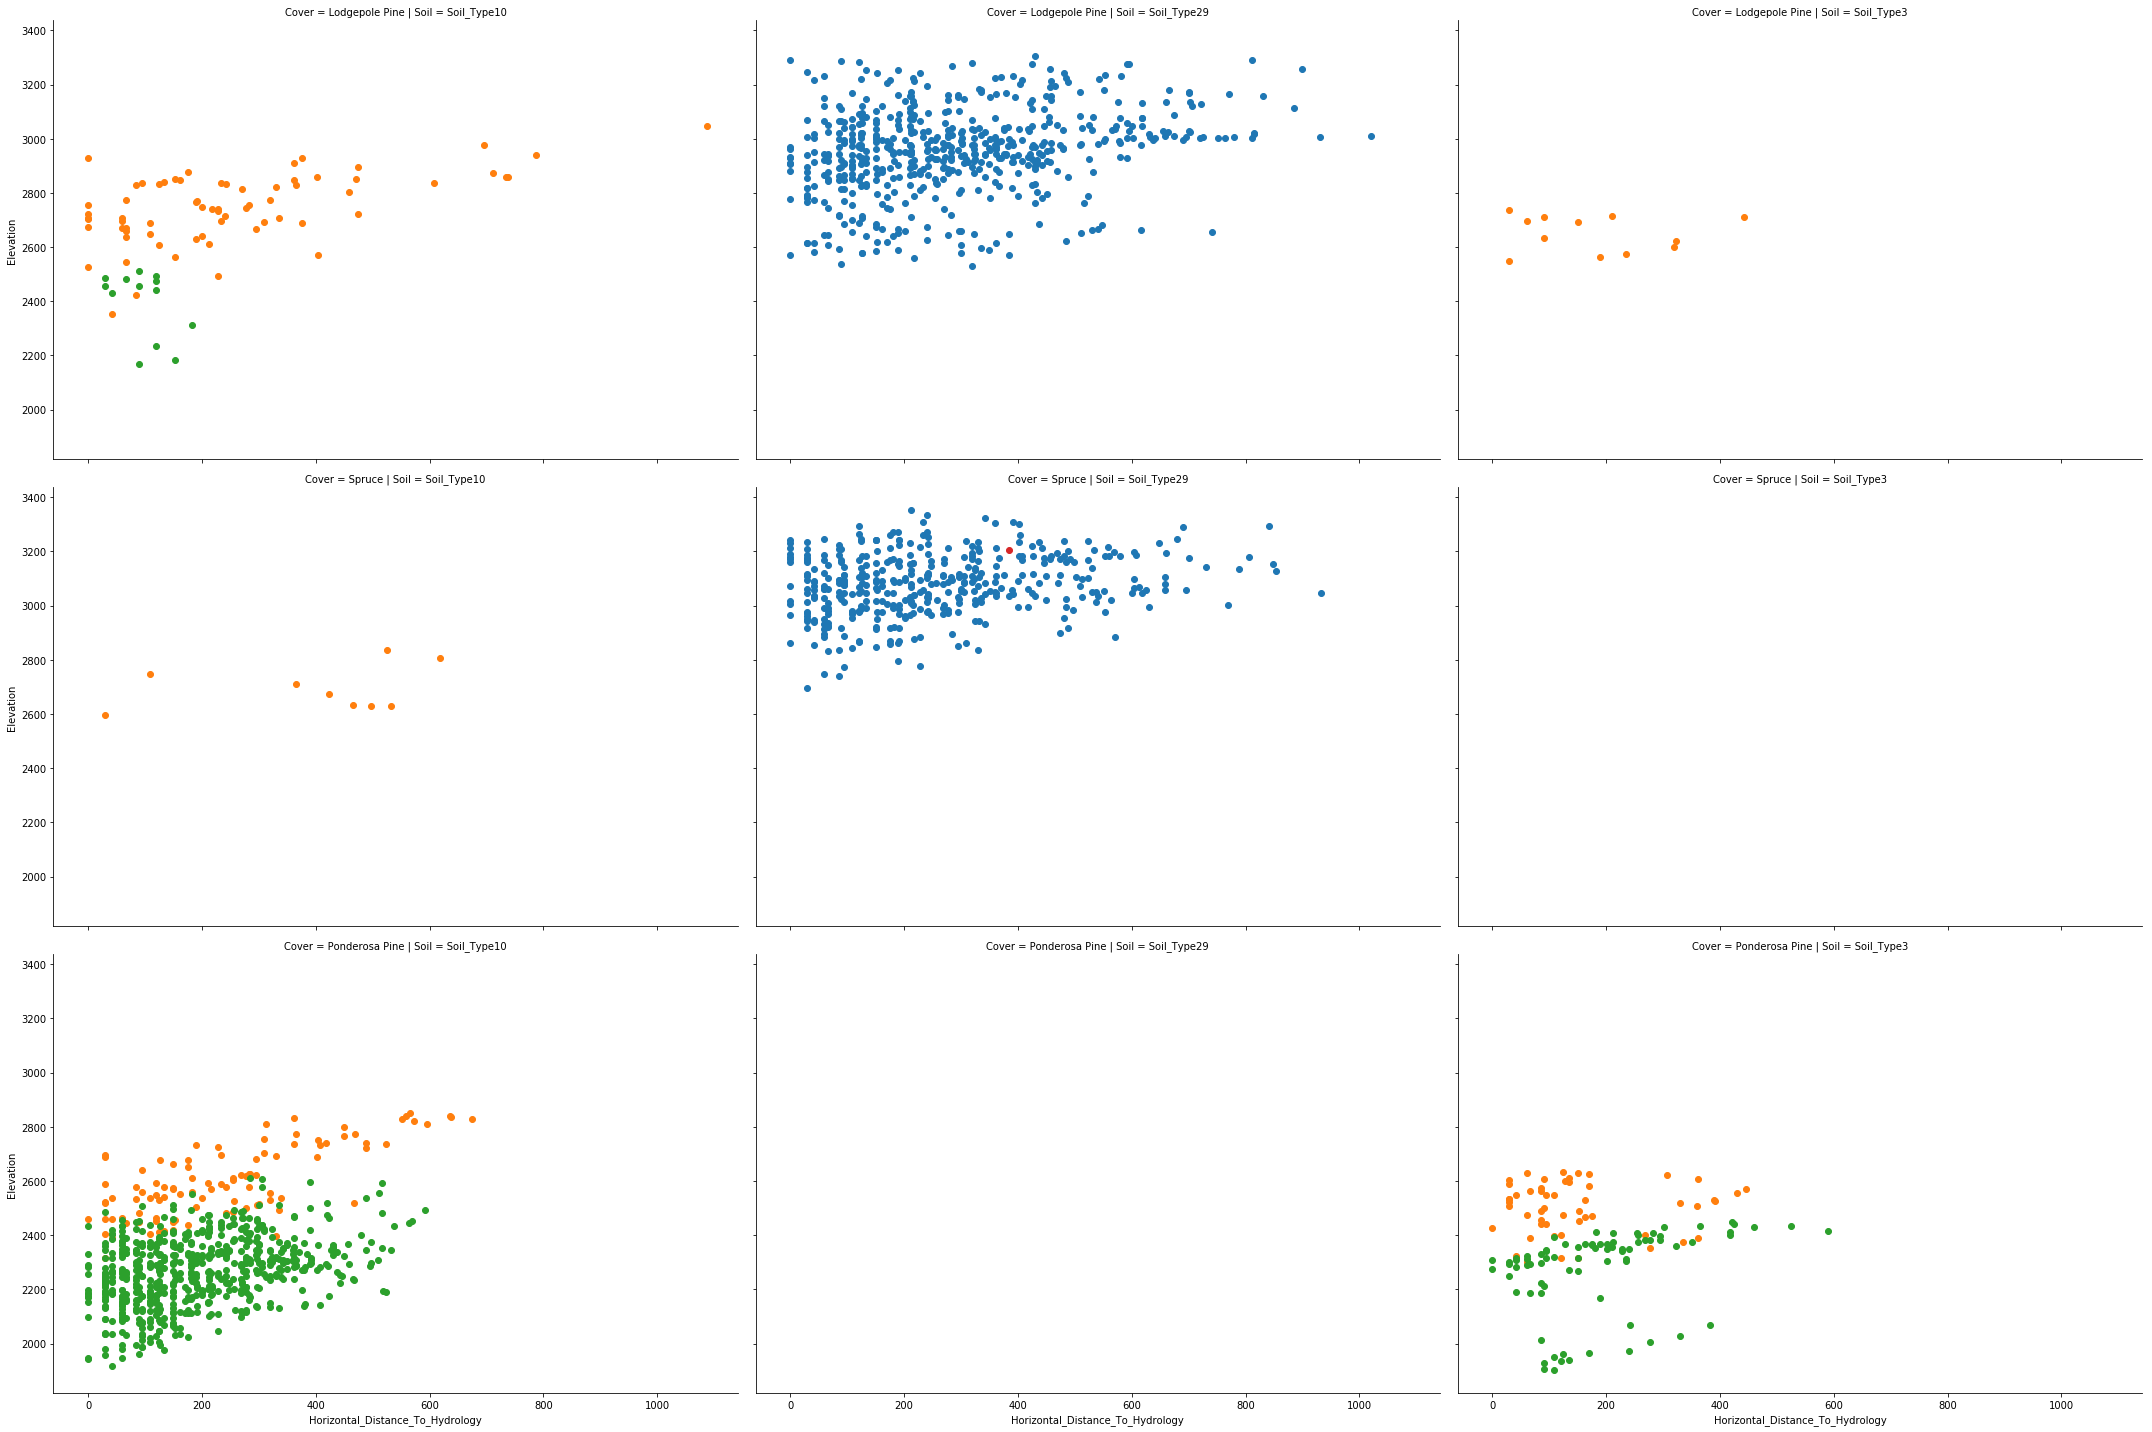

In [11]:

g = sns.FacetGrid(train_less_Soil, row="Cover",col="Soil",  hue="Wilderness")
g.fig.set_size_inches(30,20)
g.map(plt.scatter, "Horizontal_Distance_To_Hydrology","Elevation")

In [119]:
train.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [316]:
for_pca = train[['Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',"Cover_Type"]].copy()
corr = for_pca.corr()

In [317]:
cmap = sns.diverging_palette(128, 240,as_cmap=True)
plt.rcParams.update({'font.size': 12})


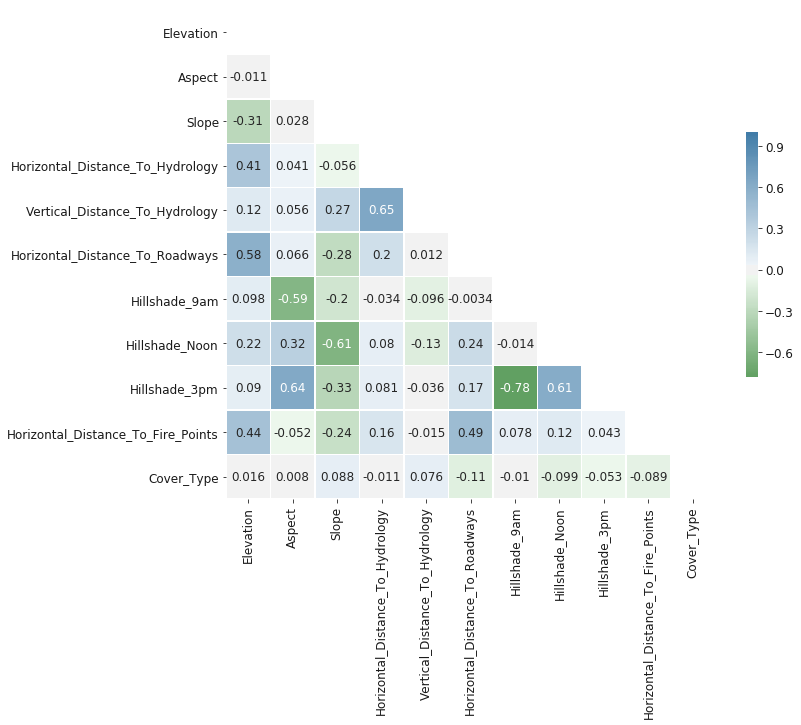

In [318]:
corr = for_pca.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [319]:
for_pca["distance_to_hydrology"] = np.sqrt(train.Horizontal_Distance_To_Hydrology**2 + train.Vertical_Distance_To_Hydrology**2)
angles_col = []
for col in ["Aspect","Slope"]:
    for_pca["sin_"+col] = np.sin(np.radians(for_pca[col]))
    for_pca["cos_"+col] = np.cos(np.radians(for_pca[col]))

for op_1 in ["sin","cos"]:
    for op_2 in ["sin","cos"]:
        for_pca[f"combine_{op_1}_{op_2}"] = for_pca[op_1+"_Aspect"]*for_pca[op_2+"_Slope"]


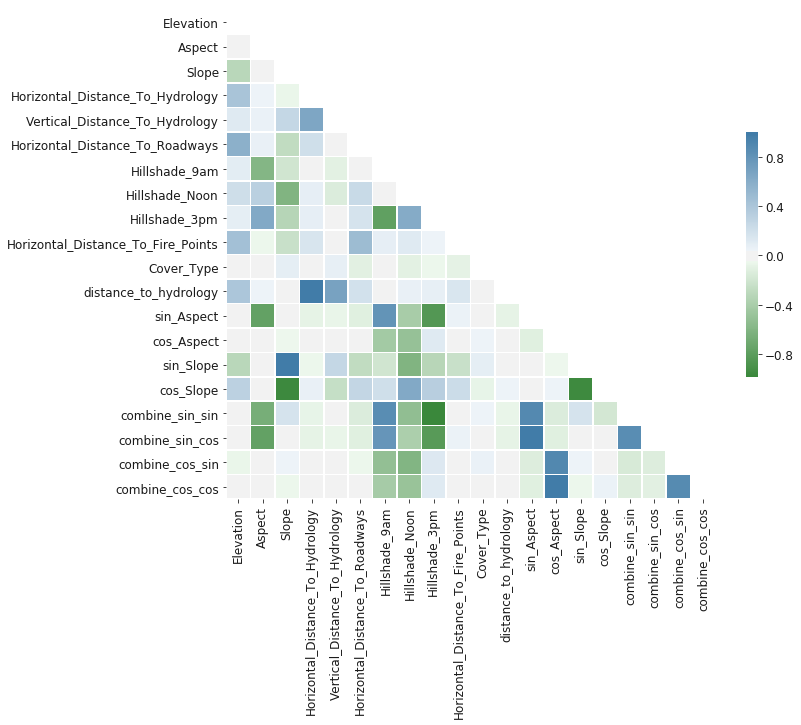

In [320]:
corr = for_pca.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [209]:
train.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

/Users/severinhatt/Virtualenvs/thinkful/base_plotting/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


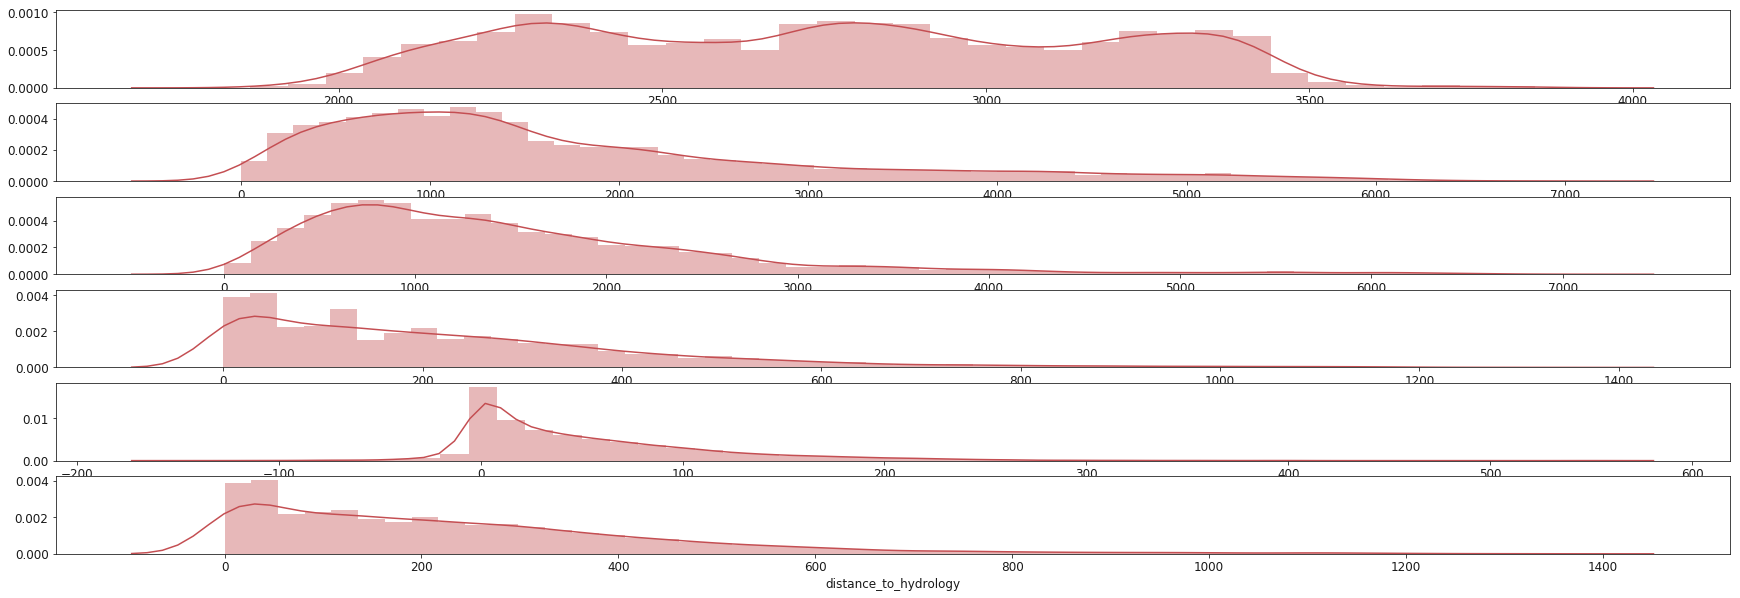

In [321]:
to_see = ["Elevation","Horizontal_Distance_To_Roadways"
                       ,"Horizontal_Distance_To_Fire_Points"
                       ,"Horizontal_Distance_To_Hydrology"
                       ,"Vertical_Distance_To_Hydrology","distance_to_hydrology"]

f, axes = plt.subplots(len(to_see), 1, figsize=(30, 10))

#sns.distplot(train.Elevation, kde=False, color="b", ax=axes[0]);
for i,col in enumerate(to_see):
    sns.distplot(for_pca[col], hist=True, color="r",ax=axes[i])
    axes[i].set_title("")

In [322]:
for col in ["Horizontal_Distance_To_Roadways"
                       ,"Horizontal_Distance_To_Fire_Points"
                       ,"Horizontal_Distance_To_Hydrology"
                       ,"distance_to_hydrology"]:
    for_pca[col+"_log"] = np.log10(pd.to_numeric(for_pca[col]) +1)

# Changing the variable

The last distance variable seem to have a very long tail (a lot of values around 0 and then very few very large values).

To reduce the influence of the tail, we will use a log10 of those variables.

/Users/severinhatt/Virtualenvs/thinkful/base_plotting/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


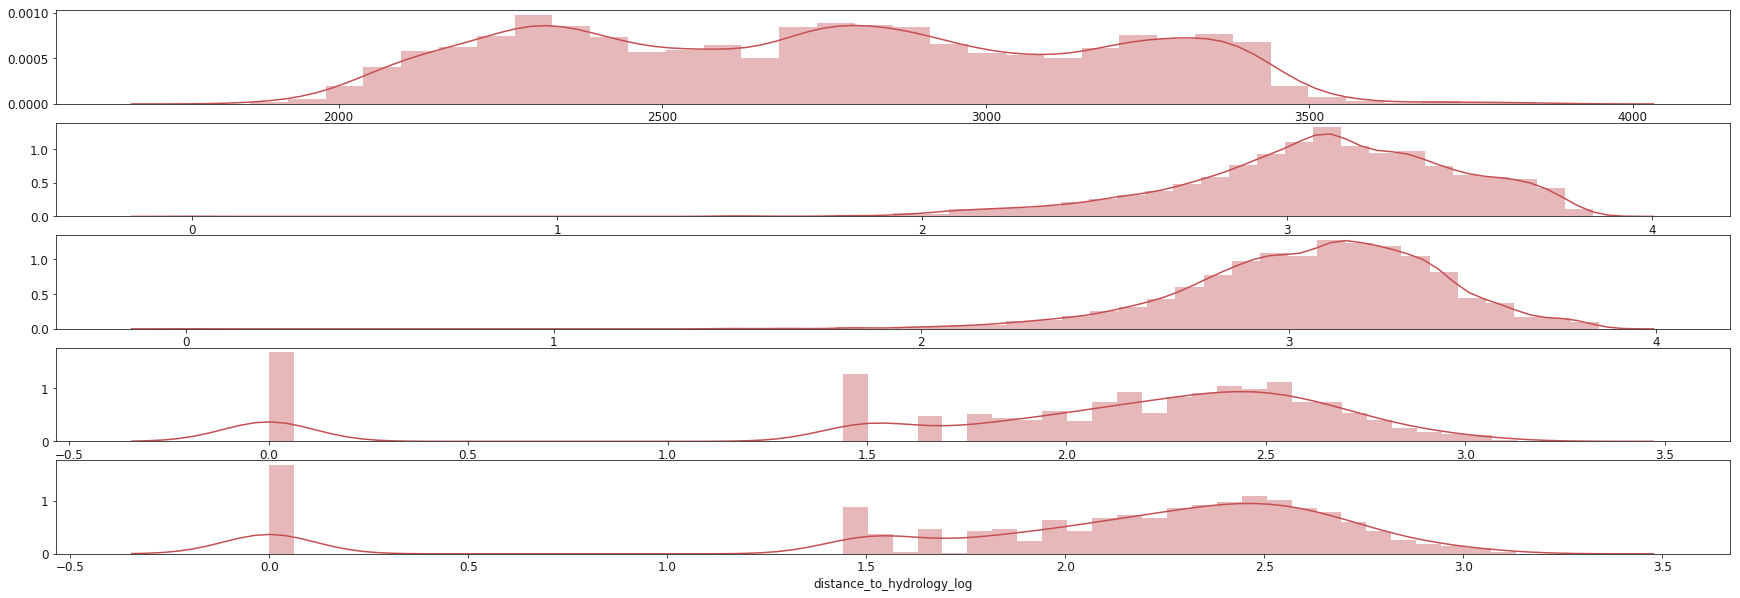

In [323]:
to_see = ["Elevation","Horizontal_Distance_To_Roadways_log"
                       ,"Horizontal_Distance_To_Fire_Points_log"
                       ,"Horizontal_Distance_To_Hydrology_log"
                       ,"distance_to_hydrology_log"]

f, axes = plt.subplots(len(to_see), 1,  figsize=(30, 10))

#sns.distplot(train.Elevation, kde=False, color="b", ax=axes[0]);
for i,col in enumerate(to_see):
    sns.distplot(for_pca[col], hist=True, color="r",ax=axes[i])
    axes[i].set_title("")

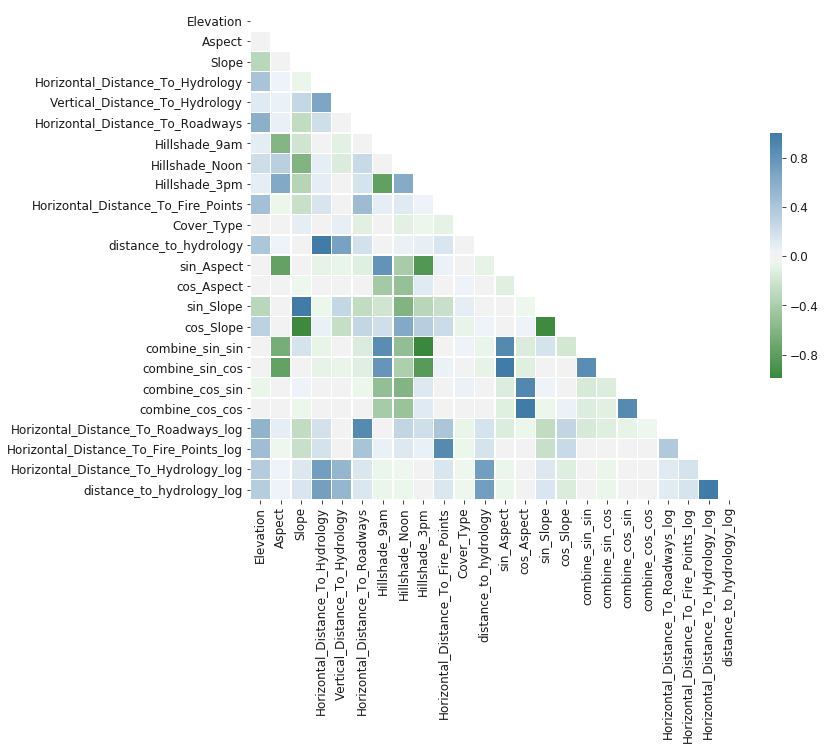

In [324]:
corr = for_pca.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [211]:
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [325]:
distance_pca = for_pca[["Elevation","Horizontal_Distance_To_Roadways_log"
                       ,"Horizontal_Distance_To_Fire_Points_log"
                       ,"Horizontal_Distance_To_Hydrology_log"
                       ,"distance_to_hydrology_log"
                       ,"Vertical_Distance_To_Hydrology"]]

In [326]:
sklearn_pca = PCA(n_components=2)
X = StandardScaler().fit_transform(X)
Y_sklearn = sklearn_pca.fit_transform(distance_pca)

In [341]:
sklearn_pca.components_

array([[-0.49169062,  0.24296982,  0.54072583,  0.44424224, -0.11301479,
         0.44350656],
       [-0.323821  , -0.62678454, -0.16116737,  0.05359882,  0.62554203,
         0.28658421]])

In [328]:
for_pca["dis_pca_1"] = Y_sklearn[:,0]
for_pca["dis_pca_2"] = Y_sklearn[:,1]

/Users/severinhatt/Virtualenvs/thinkful/base_plotting/lib/python3.7/site-packages/matplotlib/legend.py:592: UserWarning: The handle <matplotlib.patches.Patch object at 0x1146ab128> has a label of '_nolegend_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


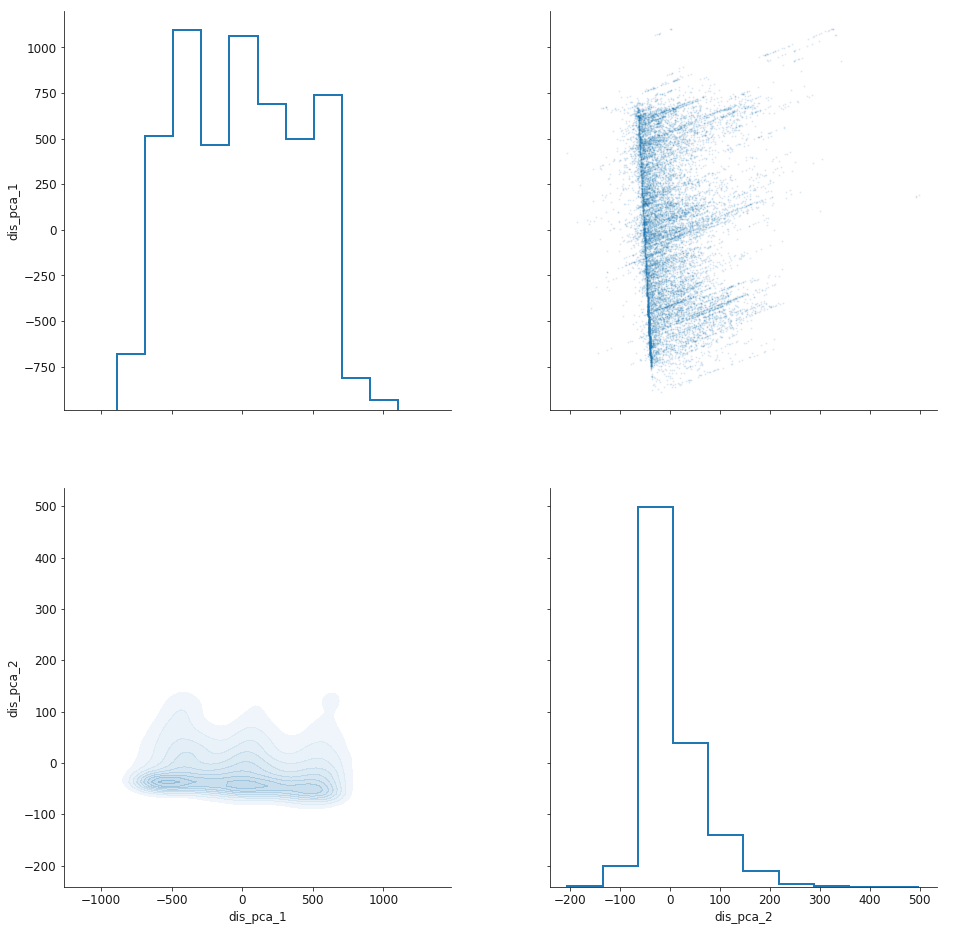

In [329]:
g = sns.PairGrid(for_pca, vars=["dis_pca_1","dis_pca_2"]
                 ,diag_sharey=False)
g.map_upper(plt.scatter,alpha=0.1, s=1)

g.map_lower(sns.kdeplot,alpha=0.3,shade=True, shade_lowest=False)
g = g.map_diag(plt.hist, histtype="step", linewidth=2)

g.add_legend();
g.fig.set_size_inches(15,15)

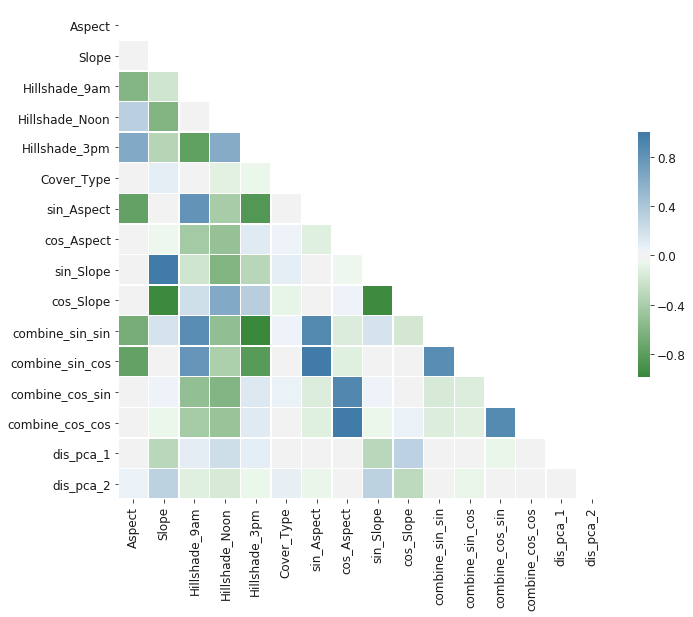

In [330]:
for_pca_after_distance = for_pca.drop(["Elevation","Horizontal_Distance_To_Roadways"
                       ,"Horizontal_Distance_To_Fire_Points"
                       ,"Horizontal_Distance_To_Hydrology"
                       ,"Vertical_Distance_To_Hydrology"
                       ,"distance_to_hydrology"
                        ,"Horizontal_Distance_To_Roadways_log"
                       ,"Horizontal_Distance_To_Fire_Points_log"
                       ,"Horizontal_Distance_To_Hydrology_log"
                       ,"distance_to_hydrology_log"],axis=1)
corr = for_pca_after_distance.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [219]:
for_pca_after_distance.columns

Index(['Aspect', 'Slope', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Cover_Type', 'distance_to_hydrology', 'sin_Aspect', 'cos_Aspect',
       'sin_Slope', 'cos_Slope', 'combine_sin_sin', 'combine_sin_cos',
       'combine_cos_sin', 'combine_cos_cos', 'dis_pca_1', 'dis_pca_2'],
      dtype='object')

In [331]:
trigo_pca = for_pca[['sin_Aspect', 'sin_Slope',
       'combine_sin_sin', 'cos_Aspect', 'cos_Slope',
       'combine_sin_cos',  'combine_cos_sin',
       'combine_cos_cos', ]]
sklearn_pca = PCA(n_components=1)
X = StandardScaler().fit_transform(X)
Y_sklearn = sklearn_pca.fit_transform(trigo_pca)

In [332]:
for_pca["trig_pca_1"] = Y_sklearn[:,0]


In [333]:
sklearn_pca.components_

array([[-0.47094685, -0.00629536, -0.14021121,  0.53255753,  0.00231291,
        -0.4439224 ,  0.15020499,  0.50523138]])

In [334]:
for_pca.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Cover_Type',
       'distance_to_hydrology', 'sin_Aspect', 'cos_Aspect', 'sin_Slope',
       'cos_Slope', 'combine_sin_sin', 'combine_sin_cos', 'combine_cos_sin',
       'combine_cos_cos', 'Horizontal_Distance_To_Roadways_log',
       'Horizontal_Distance_To_Fire_Points_log',
       'Horizontal_Distance_To_Hydrology_log', 'distance_to_hydrology_log',
       'dis_pca_1', 'dis_pca_2', 'trig_pca_1'],
      dtype='object')

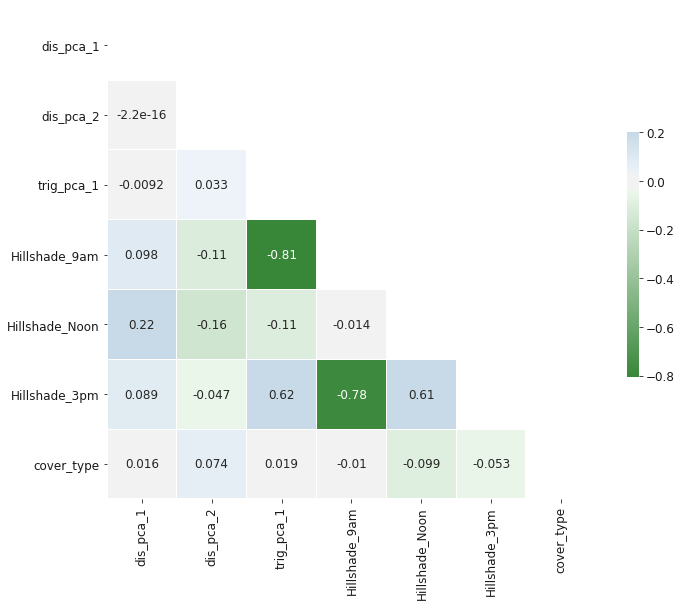

In [335]:
after_pca = for_pca[['dis_pca_1','dis_pca_2', 'trig_pca_1','Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm']].copy()
after_pca["cover_type"] = train.Cover_Type
after_pca["cover"] = train.Cover
corr = after_pca.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr,  mask=mask,cmap=cmap, center=0, vmax=0.2,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [336]:
shade_pca = for_pca[['Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',"Aspect","Slope","trig_pca_1"]]
sklearn_pca = PCA(n_components=2)
X = StandardScaler().fit_transform(shade_pca)
Y_sklearn = sklearn_pca.fit_transform(X)
for_pca["shade_pca_1"] = Y_sklearn[:,0]
for_pca["shade_pca_2"] = Y_sklearn[:,1]


In [337]:
sklearn_pca.components_

array([[-0.49169062,  0.24296982,  0.54072583,  0.44424224, -0.11301479,
         0.44350656],
       [-0.323821  , -0.62678454, -0.16116737,  0.05359882,  0.62554203,
         0.28658421]])

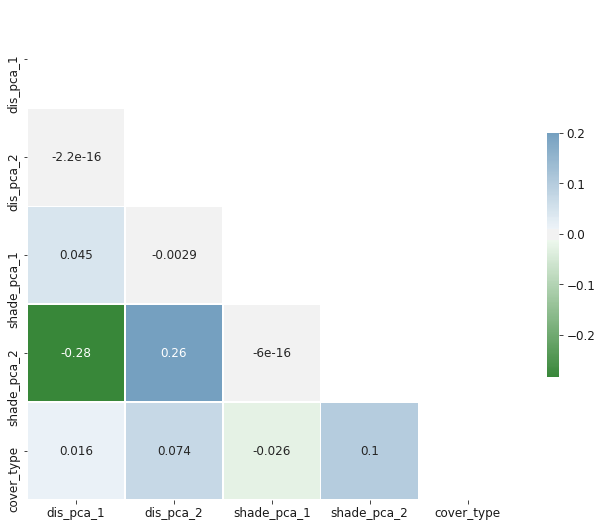

In [338]:
after_pca = for_pca[['dis_pca_1','dis_pca_2','shade_pca_1','shade_pca_2']].copy()
after_pca["cover_type"] = train.Cover_Type
after_pca["cover"] = train.Cover
corr = after_pca.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr,  mask=mask,cmap=cmap, center=0, vmax=0.2,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

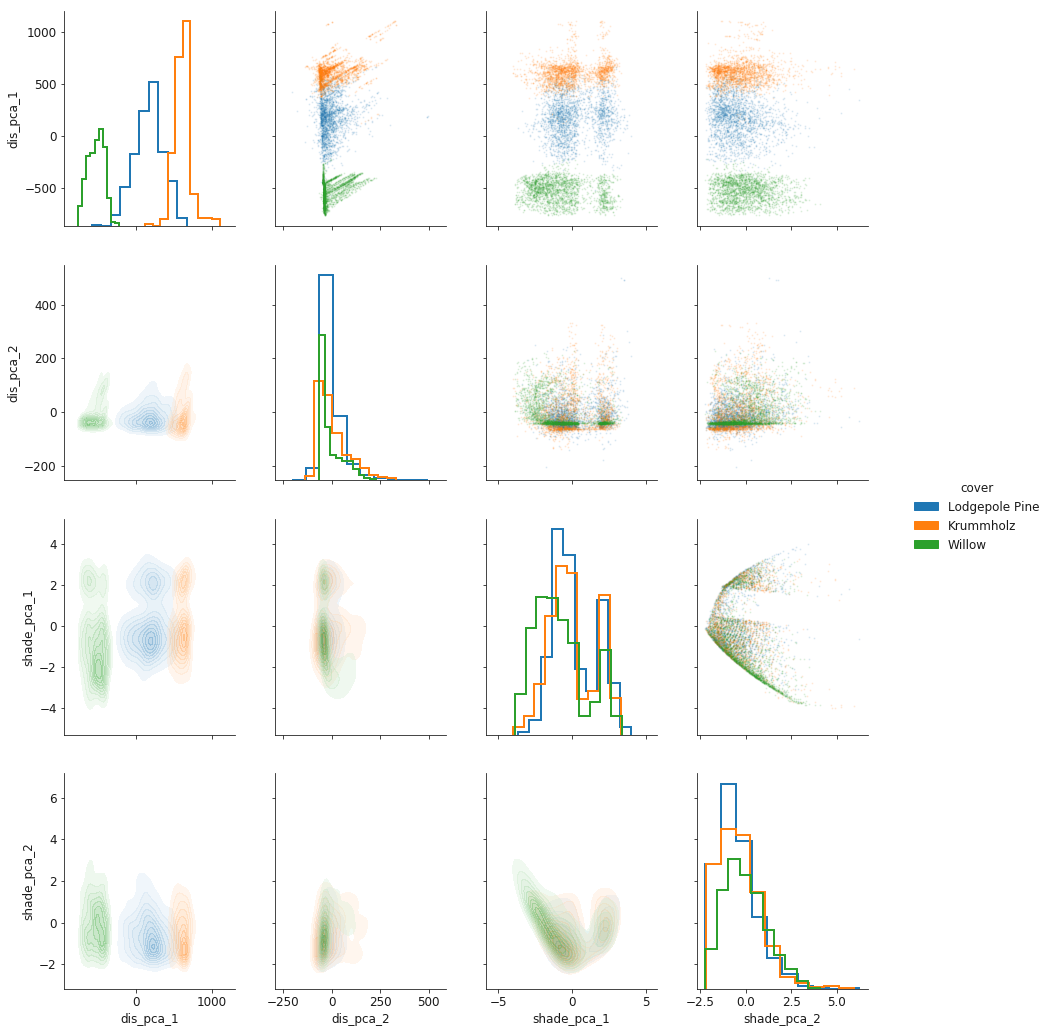

In [339]:
after_pca_charts = after_pca[after_pca.cover_type.isin([2,4,7])].copy()
g = sns.PairGrid(after_pca_charts,vars=['dis_pca_1','dis_pca_2','shade_pca_1','shade_pca_2'],
                 hue="cover",diag_sharey=False)
g.map_upper(plt.scatter,alpha=0.1, s=1)

g.map_lower(sns.kdeplot,alpha=0.3,shade=True, shade_lowest=False)
g = g.map_diag(plt.hist, histtype="step", linewidth=2)

g.add_legend();
g.fig.set_size_inches(15,15)

In [189]:
for_pca.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,combine_cos_sin,combine_cos_cos,combine_cos_tan,combine_tan_sin,combine_tan_cos,combine_tan_tan,dis_pca_1,dis_pca_2,trig_pca_1,shade_pca_1
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,1.512000e+04,1.512000e+04,1.512000e+04,1.512000e+04,1.512000e+04,1.512000e+04,1.512000e+04
mean,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,...,0.036878,0.140546,0.039483,3.306080e+13,1.253319e+14,3.632838e+13,1.693874e-13,3.849713e-15,-2.116402e-02,1.034610e-14
std,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,...,0.210555,0.652556,0.232985,4.312169e+14,1.340346e+15,4.883734e+14,1.520593e+03,8.505720e+02,2.014066e+15,5.379657e+01
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,...,-0.633704,-1.000000,-0.839667,-3.605374e+01,-5.658463e+01,-4.639250e+01,-2.284069e+03,-3.587309e+03,-1.883691e+14,-1.487269e+02
25%,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,...,-0.107604,-0.459472,-0.113193,-2.938201e-01,-1.019883e+00,-3.156599e-01,-1.058898e+03,-4.648759e+02,-1.883691e+14,-3.509107e+01
50%,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,...,0.049569,0.255600,0.051065,-1.214266e-02,-5.106457e-02,-1.229573e-02,-5.117046e+02,-3.219014e+01,-1.883691e+14,5.748747e-01
75%,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,1988.250000,...,0.185919,0.760227,0.194201,2.254578e-01,9.659258e-01,2.363650e-01,7.453278e+02,4.364454e+02,-1.883691e+14,3.632474e+01
max,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,6993.000000,...,0.705384,1.000000,0.997564,1.005451e+16,1.632875e+16,1.275936e+16,6.313060e+03,4.667142e+03,2.410299e+16,1.680732e+02


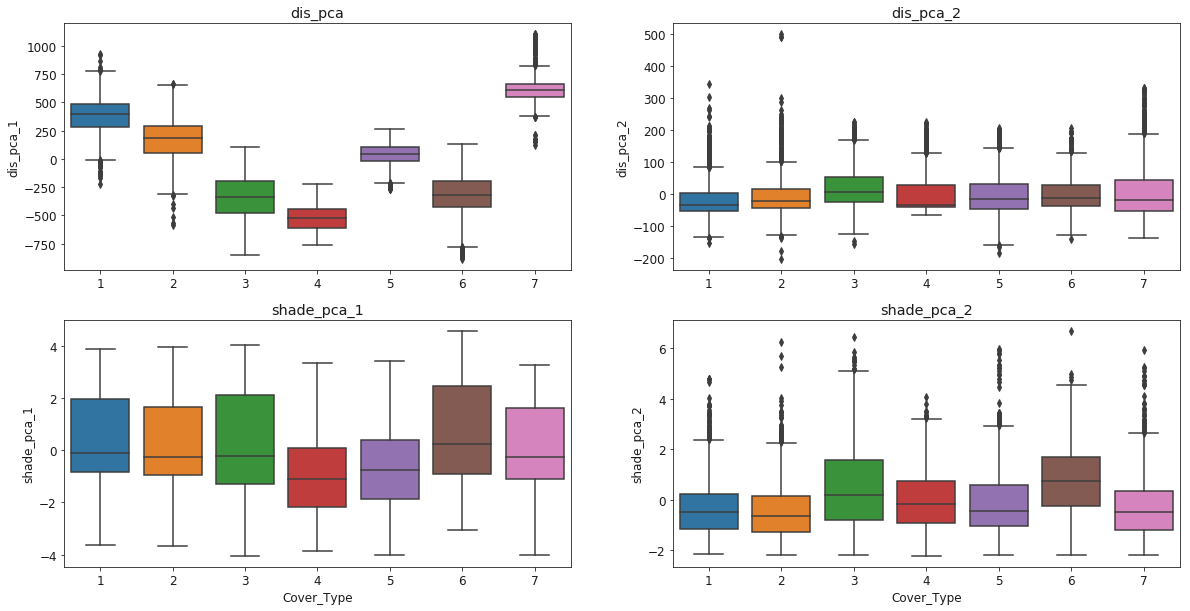

In [340]:
f, axes = plt.subplots(2, 2, figsize=(20, 10))

#sns.distplot(train.Elevation, kde=False, color="b", ax=axes[0]);
sns.boxplot(x="Cover_Type", y="dis_pca_1", data=for_pca,ax=axes[0][0]);
axes[0][0].set_title("dis_pca")
axes[0][0].axes.set_xlabel("")
sns.boxplot(x="Cover_Type", y="dis_pca_2", data=for_pca,ax=axes[0][1])
axes[0][1].set_title("dis_pca_2")
axes[0][1].axes.set_xlabel("")


sns.boxplot(x="Cover_Type", y="shade_pca_1", data=for_pca,ax=axes[1][0])
axes[1][0].set_title("shade_pca_1")

sns.boxplot(x="Cover_Type", y="shade_pca_2", data=for_pca,ax=axes[1][1])
axes[1][1].set_title("shade_pca_2");



Text(0.5,1,'Horizontal_Distance_To_Fire_Points')

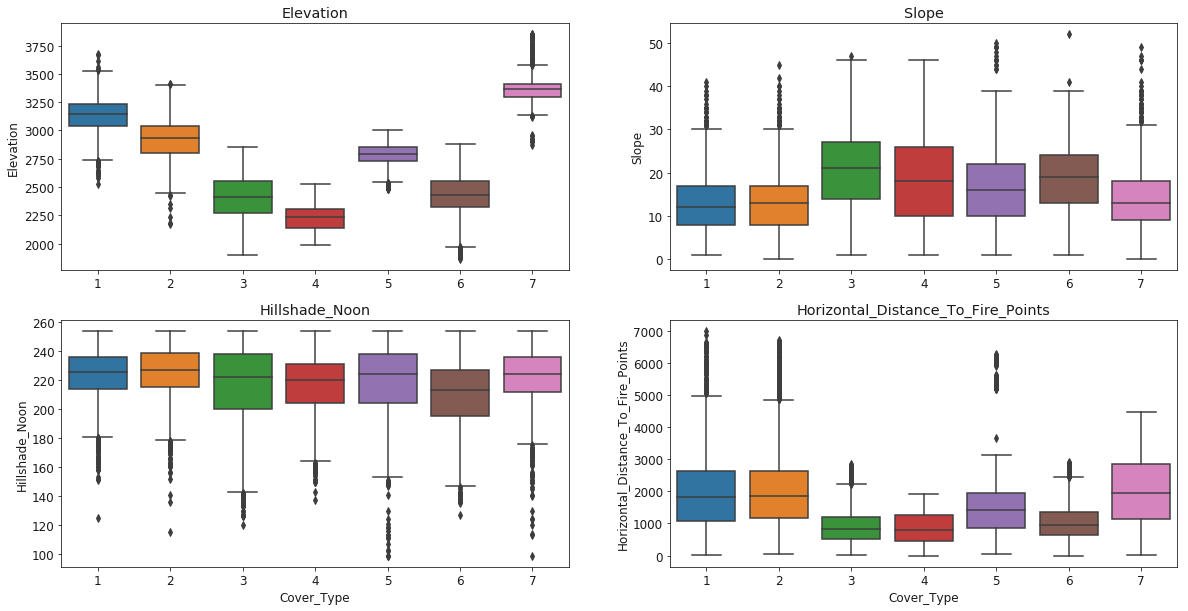

In [202]:
f, axes = plt.subplots(2, 2, figsize=(20, 10))

#sns.distplot(train.Elevation, kde=False, color="b", ax=axes[0]);
sns.boxplot(x="Cover_Type", y="Elevation", data=for_pca,ax=axes[0][0]);
axes[0][0].set_title("Elevation")
axes[0][0].axes.set_xlabel("")
sns.boxplot(x="Cover_Type", y="Slope", data=for_pca,ax=axes[0][1])
axes[0][1].set_title("Slope")
axes[0][1].axes.set_xlabel("")


sns.boxplot(x="Cover_Type", y="Hillshade_Noon", data=for_pca,ax=axes[1][0])
axes[1][0].set_title("Hillshade_Noon")

sns.boxplot(x="Cover_Type", y="Horizontal_Distance_To_Fire_Points", data=for_pca,ax=axes[1][1])
axes[1][1].set_title("Horizontal_Distance_To_Fire_Points")



In [230]:
train.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [242]:
pca_for_soil = train[['Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39']].copy()

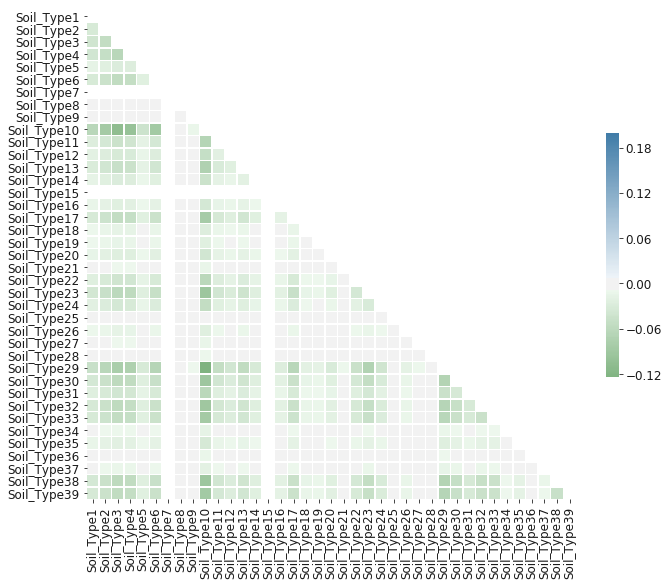

In [260]:
corr = pca_for_soil.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr,  mask=mask,cmap=cmap, center=0, vmax=0.2 ,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [273]:
name = "soil_type_"
sklearn_pca = PCA(n_components=20)
X = StandardScaler().fit_transform(pca_for_soil)
Y_sklearn = sklearn_pca.fit_transform(X)
for i in range(sklearn_pca.n_components):
    for_pca[name+str(i)] = Y_sklearn[:,i]


In [281]:
len(sklearn_pca.components_[0])

39

<BarContainer object of 39 artists>

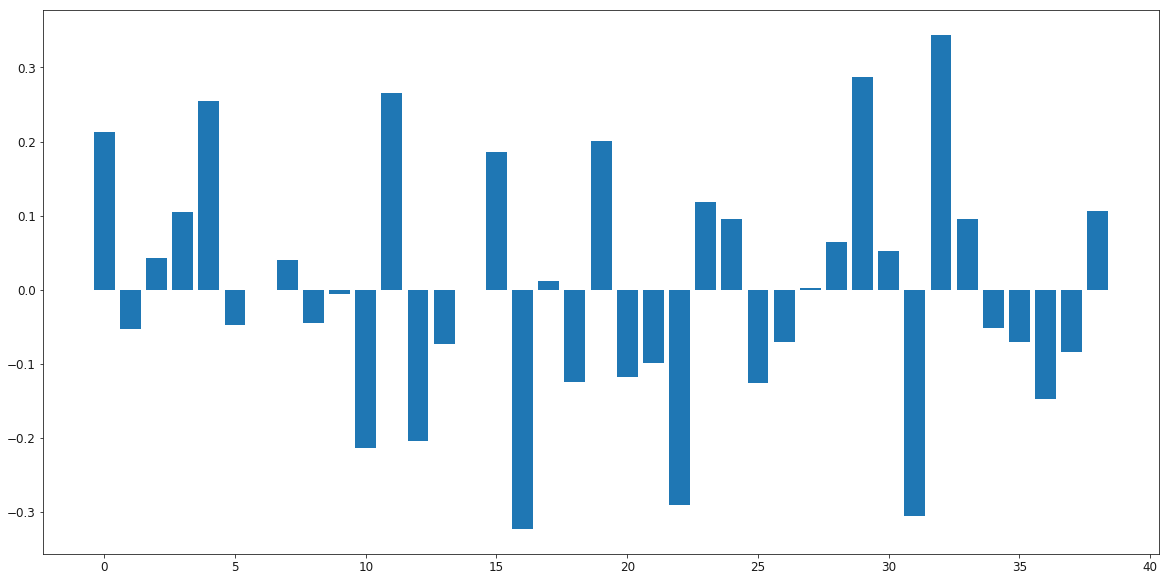

In [291]:
plt.bar(x=range(39),height=sklearn_pca.components_[10])

In [275]:
sklearn_pca.explained_variance_

array([1.14136769, 1.08215708, 1.05865349, 1.05371573, 1.04884526,
       1.04596941, 1.04505796, 1.03981207, 1.03524294, 1.03289226,
       1.03143324, 1.0294251 , 1.02596717, 1.02321825, 1.0200128 ,
       1.0167199 , 1.01584214, 1.01446476, 1.01158854, 1.01000658])